### DEMSLV01 

# Compute root of $f(x)=\exp(-x)-1$

Compute root of $f(x)=\exp(-x)-1$ using Newton and secant methods. Initial value generated randomly. True root is $x=0$.

In [1]:
from demos.setup import np, plt, tic, toc
from numpy.linalg import norm
from compecon import NLP
%matplotlib inline

### Set up the problem

In [2]:
def f(x):
    fval = np.exp(-x) - 1
    fjac = -np.exp(-x)
    return fval, fjac

problem = NLP(f, all_x=True)

### Randomly generate starting point

In [3]:
problem.x0 = 10 * np.random.randn(1)

### Compute root using Newton method

In [4]:
t0 = tic()
x1 = problem.newton()
t1 = 100 * toc(t0)
n1, x_newton = problem.fnorm, problem.x_sequence

### Compute root using Broyden method

In [5]:
t0 = tic()
x2 = problem.broyden()
t2 = 100 * toc(t0)
n2, x_broyden = problem.fnorm, problem.x_sequence

### Print results

In [6]:
print('Hundredths of seconds required to compute root of exp(-x)-1,')
print('via Newton and Broyden methods, starting at x = %4.2f.' % problem.x0)
print('\nMethod      Time   Norm of f   Final x')
print('Newton  %8.2f    %8.0e     %5.2f' % (t1, n1, x1))
print('Broyden %8.2f    %8.0e     %5.2f' % (t2, n2, x2))

Hundredths of seconds required to compute root of exp(-x)-1,
via Newton and Broyden methods, starting at x = -5.52.

Method      Time   Norm of f   Final x
Newton      0.47       1e-14     -0.00
Broyden     0.00       7e-09     -0.00


### View current options for solver

In [7]:
print(problem.opts)

Options for solving a NLP:

	    all_x = True
	    initb = None
	    initi = False
	    maxit = 100
	 maxsteps = 10
	   method = broyden
	    print = False
	      tol = 1.49011611938e-08
	transform = ssmooth



# Describe the options

In [8]:
print(problem.opts.__doc__)

 A container for options to find a zero for a NLP or MCP

    Attributes: default in brackets
        method:     either ['newton'] or 'broyden'
        maxit:      maximum number of iterations [100]
        maxsteps:   maximum number of backsteps [10]
        tol:        convergence tolerance [sqrt(machine eps)]
        initb:      an initial inverse Jacobian aprroximation matrix [None]
        initi:      if True, use the identity matrix to initialize Jacobian,
                    if [False], a numerical Jacobian will be used
        transform:  either ['ssmooth'] or 'minmax', required for MC problems
        print: print to screen if [True], quiet if False
        all_x:      whether to output the full solution sequence too [False]
    


### Plot the convergence

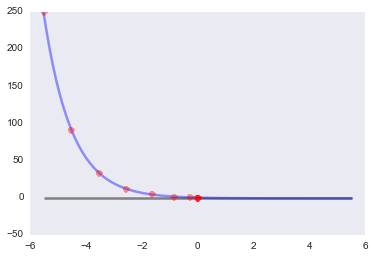

In [9]:
b = -abs(problem.x0)
a = -b
xx = np.linspace(a, b, 100)

fig = plt.figure()
plt.hlines(0, a, b, 'gray')
plt.plot(xx, f(xx)[0], 'b-', alpha=0.4)
plt.plot(x_newton,f(x_newton)[0],'ro:', alpha=0.4)
plt.show()